# Sorting Algoriths Evaluation report
- Academic Year: 2019/20
- Faculty of Computing - Artificial Intelligence - Semester 2
- Full name and student id: Kacper Trębacz 145453
- Subject: Algorithms and Data Structures


The main purpose of the excercise was to evaluate performance of the most popular sorting algorithms. There were 2 main tasks defined below. At first lets look at definitions of sequence generation funciton and implementations of algorithms.

# Sequences generations

In [1]:
from random import randint
import sys
import matplotlib.pyplot as plt
import numpy as np
import time 
import math
sys.setrecursionlimit(10**9)
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
def uniform_distribution(n,upper=0):
    if upper == 0:
        upper = 5*n
    return [randint(0,upper) for i in range(0,n)]

def constant_distribution(n):
    return [5 for i in range(0,n)]

def ascending_order(n):
    return [i for i in range(0,n)]

def descending_order(n):
    return [n-i-1 for i in range(0,n)]

def asc_desc_order(n):
    if n%2 ==0:
        return [i for i in range(1,n,2)]+[i for i in range(n-2,-1,-2)]
    else:
        return [i for i in range(1,n,2)]+[i for i in range(n-1,-1,-2)]

def desc_asc_order(n):
    if n%2 ==0:
        return [i for i in range(n-1,-1,-2)]+[i for i in range(0,n,2)]
    else:
        return [i for i in range(n-2,-1,-2)]+[i for i in range(0,n,2)]

## Check function

In [3]:
def check(sorting_function):
    count =0
    iterations=1000
    for i in range(iterations):
        arr=uniform_distribution(i)
        if(sorting_function(arr.copy())==sorted(arr.copy())):
            count+=1
    if count == iterations:
        print("It works")
    else:
        print("It doesn't work")   

# Sorting Algorithms Definitions

### Bubble Sort

In [4]:
def bubble_sort(arr):
    length = len(arr)
    for i in range(length-1,-1,-1):
        for j in range(0,i):
            if arr[j]> arr[j+1]:
                arr[j],arr[j+1] = arr[j+1],arr[j]
    return arr

In [5]:
#  check(bubble_sort)

### Heap Sort

In [1]:
def build_heap(arr, n, i):
    print(arr)
    max_el = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[i] < arr[l]: 
        max_el = l
    if r < n and arr[max_el] < arr[r]: 
        max_el = r 
    if max_el != i: 
        arr[i],arr[max_el] = arr[max_el],arr[i]
        build_heap(arr, n, max_el) 
def heap_sort(arr): 
    n = len(arr)  
    for i in range(int(n/2 - 1), -1, -1): 
        build_heap(arr, n, i) 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]
        build_heap(arr, i, 0)
    return arr

heap_sort([7,12,5,15,3,16,2])

[7, 12, 5, 15, 3, 16, 2]
[7, 12, 16, 15, 3, 5, 2]
[7, 12, 16, 15, 3, 5, 2]
[7, 15, 16, 12, 3, 5, 2]
[7, 15, 16, 12, 3, 5, 2]
[16, 15, 7, 12, 3, 5, 2]
[2, 15, 7, 12, 3, 5, 16]
[15, 2, 7, 12, 3, 5, 16]
[15, 12, 7, 2, 3, 5, 16]
[5, 12, 7, 2, 3, 15, 16]
[12, 5, 7, 2, 3, 15, 16]
[3, 5, 7, 2, 12, 15, 16]
[7, 5, 3, 2, 12, 15, 16]
[2, 5, 3, 7, 12, 15, 16]
[5, 2, 3, 7, 12, 15, 16]
[3, 2, 5, 7, 12, 15, 16]
[2, 3, 5, 7, 12, 15, 16]


[2, 3, 5, 7, 12, 15, 16]

In [7]:
# check(heap_sort)


### Merge Sort

In [8]:
def merge(arr,dup,l,m,r):
    for i in range(l,r):
        dup[i]=arr[i]
    j=l
    l1=l
    l2=m
    while l1<m and l2<r:
        if dup[l1] < dup[l2]:
            arr[j]=dup[l1]
            l1+=1
        else:
            arr[j]=dup[l2]
            l2+=1
        j+=1
    while l1<m:
        arr[j]=dup[l1]
        l1+=1
        j+=1
    while l2<r:
        arr[j]=dup[l2]
        l2+=1
        j+=1           
def merge_sort_rec(arr,dup,l,m,r):
    if l >= r-1:
        return
    merge_sort_rec(arr,dup,l,int(l+(m-l)/2),m)
    merge_sort_rec(arr,dup,m,int(m+(r-m)/2),r)
    
    merge(arr,dup,l,m,r)

def merge_sort(arr):
    if len(arr)<= 1:
        return arr
    l=0
    r=len(arr)
    m= int(l +(r-l)/2)
    dup=arr.copy()
    merge_sort_rec(arr,dup,0,m,r)
    return arr
    

In [9]:
# check(merge_sort)

### Shell Sort

In [3]:
import math
def shell_sort(arr):
    n=len(arr)
    if n == 0:
        return arr
    k=int(math.log(n,2))
    for p in range(k,0,-1):
        step=2**p-1
        print(step)
        for i in range(step,n):
            current = arr[i]
            j=i-step
            while j>-1 and current <arr[j]:
                print(arr)
                arr[j+step]=arr[j]
                j-=step
            print(arr)
            arr[j+step]=current
    return arr
shell_sort([4,2,2,1,3,3,1,0,5,4])

7
[4, 2, 2, 1, 3, 3, 1, 0, 5, 4]
[4, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
3
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
1
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 1, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 2, 3, 3, 1, 4, 5, 4]
[0, 2, 2, 2, 3, 3, 1, 4, 5, 4]
[0, 1, 2, 2, 3, 3, 1, 4, 5, 4]
[0, 1, 2, 2, 3, 3, 1, 4, 5, 4]
[0, 1, 2, 2, 3, 3, 1, 4, 5, 4]
[0, 1, 2, 2, 3, 3, 3, 4, 5, 4]
[0, 1, 2, 2, 3, 3, 3, 4, 5, 4]
[0, 1, 2, 2, 2, 3, 3, 4, 5, 4]
[0, 1, 2, 2, 2, 3, 3, 4, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 5, 5]


[0, 1, 1, 2, 2, 3, 3, 4, 4, 5]

In [11]:
# check(shell_sort)

### Counting Sort

In [12]:
def counting_sort(arr):
    length = len(arr)
    if length <1:
        return arr
    maximum = max(arr)
    counts = [0]*(maximum+1)
    output = [0]*len(arr)
    for num in arr:
        counts[num]+=1
    for i in range(1,maximum+1):
        counts[i]=counts[i]+counts[i-1]
    for i in range(length):
        output[counts[arr[i]]-1]=arr[i]
        counts[arr[i]]-=1
    return output

In [13]:
# check(counting_sort)

### Quick Sort

In [14]:
def quick_sort_rec(arr,l,r):
#     print(arr[l:r+1])
    if l>=r:
        return
    pivot=arr[int((l+r)/2)]
    i=l
    j=r
    while(i<=j):
        while(arr[i]<pivot):
            i+=1
        while(arr[j]>pivot):
            j-=1
        if i <= j:
            arr[i],arr[j]=arr[j],arr[i]
            i+=1
            j-=1

    if l<j:
        quick_sort_rec(arr,l,j)
    if i<r:
        quick_sort_rec(arr,i,r)
            

def quick_sort(arr):
    l=0
    r=len(arr)-1
    if r>=0:
        quick_sort_rec(arr,l,r)
    return arr

In [15]:
check(quick_sort)

It works


## Time measurement

In [16]:
def measure_time(sorting_function,order):
    start = time.time()
    arr = sorting_function(order.copy())
    return time.time()-start

def average_time(sorting_function,orders):
    return sum([measure_time(sorting_function,order) for order in orders])/len(orders)

# Exercise 1

Comparing the speed of Counting Sort, Bubble Sort,, Heap Sort and Shell Sort iwhen sorting uniformly distributed random values

## Evaluation function definition

For every size of sorted arrays we generate 5 different sequences and than every algorithm sorts those 5 sequences of a given size and the average time is measured

In [17]:
def evaluate(entries,order_function,numbers):
    orders = [[ order_function(num)for i in range(5)] for num in numbers]
    ys=[[average_time(entry['sorting_function'],order) for order in orders] for entry in entries]
    for i in range(len(entries)):
        plt.plot(numbers,ys[i],label=entries[i]['name'])
    plt.legend()
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (s)')
    plt.show()

## Selecting Algorithms for evaluation

For Exercise 1 they are: Counting Sort, Bubble Sort, Heap Sort and Shell Sort

In [18]:
entries = [
    {'name':"Counting Sort",'sorting_function':counting_sort},
    {'name':"Heap Sort", 'sorting_function':heap_sort},
    {'name':"Shell Sort", 'sorting_function':shell_sort},
    {'name':"Bubble Sort", 'sorting_function':bubble_sort},
]
entries_without_bubble = [
    {'name':"Counting Sort",'sorting_function':counting_sort},
    {'name':"Heap Sort", 'sorting_function':heap_sort},
    {'name':"Shell Sort", 'sorting_function':shell_sort},
]

## Performing evaluation

#### Firstly with Bubble Sort

We run 21 iterations from 1 to 10001

In [19]:
# evaluate(entries,uniform_distribution,[i for i in range(1,10002,500)])

#### Secondly without it to compare other 3 algorithms

We run 21 iterations from 1 to 400001

In [20]:
# evaluate(entries_without_bubble,uniform_distribution,[i for i in range(1,400002,20000)])

## Counclusions

The theoretical time and memory complexities of the given algorithms are:
 - Counting Sort time:O(n+k) in our case k is always 5*n memory: O(n+k)
 - Bubble Sort time: O(n^2) memory: O(n)
 - Heap Sort time: O(nlog(n)) memory: O(n)
 - Shell Sort time: O(n^1,25) memory: O(n)
 
 This can be clearly seen in above graphs that Bubble Sort is much slower than others and its execution time grows quadratically. The second one is Shell Sort which is slower than Heap due to the fact that it has better time complexity. We can also see that for small number of elements in array (<200000) Shell Sort is better than Heap Sort because n^1,25 is smaller than nlog(n) for small numbers. The fastest one is Counting Sort because for the given numbers range(5n) its complexity is smaller, but if range was much bigger it would not be so efficient or it would consume too much memory. That is why it should be used only in specific cases. It appears that if there are not many numbers shell sort should be used and if there are more heap sort is more suitable.
 
 P.S.
 
 Do not use Bubble Sort!!!

# Exercise 2

Comparing the effectiveness of Quick Sort with middle selection pivot, Heap Sort and Merge Sort when sorting 6 different data types: 
- random (uniform distribution)
- constant value (5)
- increasing order (step equal to 1)
- descending order (step equal to 1)
- ascending-descending order (A shape – increase odd numbers - decrease even)
- descending-ascending order (V -shape – decrease odd numbers - increase even)

## Evaluation function definition

For every size of sorted arrays we generate 30 sequences (different in uniform distribution) and than every algorithm sorts those 30 sequences of a given size and the average time is measured

In [21]:
def evaluate2(sorting_entries,order_entries,numbers):
    orders = [[ [order_entry[1](num) for i in range(10)]for num in numbers]for order_entry in order_entries]
    ys=[]
    i=0
    for order_entry in orders:
            for sorting_entry in sorting_entries:
                ys.append([average_time(sorting_entry[1],order)for order in order_entry])
    print(ys)
    for i in range(len(ys)):
        plt.plot(numbers,ys[i],label = sorting_entries[i%len(sorting_entries)][0]+" "+order_entries[int(i/len(sorting_entries))][0])
        plt.xlabel('Number of Elements')
        plt.ylabel('Time (s)')
    plt.legend()
    plt.show()

## Selection Algorithms and Orders for Evaluation

At every iteration we run each sorting algotihm against 2 data types for every chart.

In [22]:
sorting_entries = [
    ['QuickSort',quick_sort],
    ['MergeSort',merge_sort],
    ['HeapSort',heap_sort]
]

sorting_entries_without_quick_sort = [
    ['MergeSort',merge_sort],
    ['HeapSort',heap_sort]
]

order_entries = [
    [
        ['Random',uniform_distribution],
        ['Constant',constant_distribution]
    ],
    [
        ['Ascending',ascending_order],
        ['Descending',descending_order]
    ],
    [
        ['Ascedning Descending',asc_desc_order],
        ['Descending Ascending',desc_asc_order]
    ]
]

We run 21 iterations from 1 to 100001

In [23]:
# evaluate2(sorting_entries,order_entries[0],[i for i in range(1,100002,5000)])

We run 21 iterations from 1 to 100001

In [24]:
# evaluate2(sorting_entries,order_entries[1],[i for i in range(1,100002,5000)])

We run 21 iterations from 1 to 100001

[[2.002716064453125e-06, 0.02944173812866211, 0.057326316833496094, 0.1256929636001587, 0.16424157619476318, 0.26496305465698244, 0.31755454540252687, 0.4808701992034912, 0.5476033687591553, 0.5855296850204468, 1.0063275814056396, 1.0265258312225343, 1.1382094144821167, 1.1894777059555053, 1.4505523681640624, 1.2236080408096313, 2.36981143951416, 2.286453437805176, 2.2406666755676268, 2.6712235689163206, 2.320710849761963], [3.5762786865234375e-07, 0.01413421630859375, 0.029847002029418944, 0.04604630470275879, 0.06253607273101806, 0.07905983924865723, 0.09730417728424072, 0.11490364074707031, 0.13724782466888427, 0.14948997497558594, 0.17228524684906005, 0.18480274677276612, 0.20265378952026367, 0.22168893814086915, 0.23888933658599854, 0.25649874210357665, 0.278888463973999, 0.2953700304031372, 0.32362611293792726, 0.3323777437210083, 0.356807541847229], [1.33514404296875e-06, 0.01979382038116455, 0.04358904361724854, 0.06901338100433349, 0.09641742706298828, 0.12559382915496825, 0.1

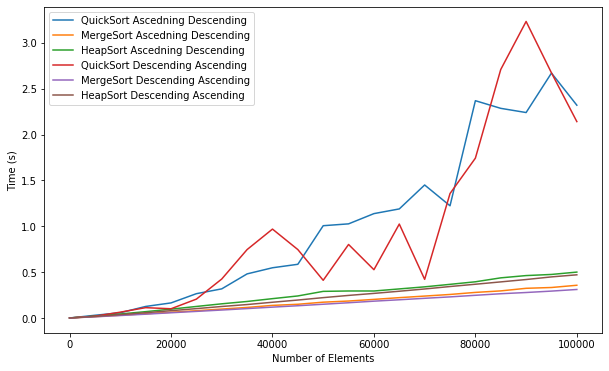

In [30]:
evaluate2(sorting_entries,order_entries[2],[i for i in range(1,100002,5000)])

And without quicksort we run 21 iterations from 1 to 100001

In [26]:
# evaluate2(sorting_entries_without_quick_sort,order_entries[2],[i for i in range(1,100002,5000)])

## Conclusions

The theoretical time and memory complexities of the given algorithms are:
 - Quick Sort time: O(nlog(n)) memory: O(n)
 - Heap Sort time: O(nlog(n)) memory: O(n)
 - Merge Sort time: O(nlog(n)) memory: O(n)
        
When Sorting uniformly distributed values Quick Sort is clearly the fastest one, which means that on average it is the best. However, we can clearly see that it has its downsides.

It is visible when we want to sort values that are in descending ascending order. Here performance is extremely unstable, and deffinately worse compared to Heap Sort and Merge Sort. So its time complexity definately is not O(nlog(n))and it is closer to O(n^2). It is due to the fact that array is 'splited' unevenly (in most cases in proportion 1:n-1, where n is size of current split)  Performance when sorting ascending descending ordered values is also worst compared to Merge Sort and Heap Sort but still a bit better than when sorting Descending Ascending Order. In my opinion it is due to the fact that than there are less switches needed in order to move value to its desired position, and there are less 1:n-1 splits

Quick Sort is also really efficient when 'sorting' already sorted values. it is due to the fact that we select a value that is a median so array is splited into two halves. In this setting Quick Sort is the most efficient, which is clearly visible. To conclude, the most efficient quick sort algorithm would always choose median value as a pivot.

In [27]:
sorting_entries_final = [
    ['QuickSort',quick_sort]
]

order_entries_final = [
        ['Random',uniform_distribution],
        ['Ascedning Descending',asc_desc_order],
        ['Descending Ascending',desc_asc_order]
]

[[0.2063291549682617, 0.20216941833496094, 0.19627828598022462], [2.5692116260528564, 2.8908937692642214, 2.541530966758728], [2.503432774543762, 2.5228184938430784, 2.5092691659927366]]


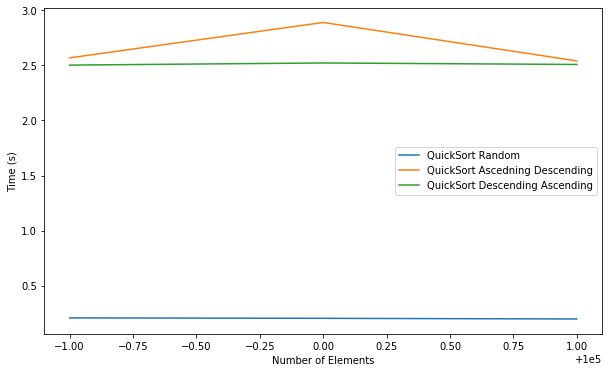

In [28]:
evaluate2(sorting_entries_final, order_entries_final,[i for i in range(99999,100002,1)])